In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving A2Q1Data.csv to A2Q1Data.csv


In [2]:
import io
data=pd.read_csv(io.BytesIO(uploaded['A2Q1Data.csv']),header=None)
data

,0
0,0
1,0
2,0
3,1
4,1
...,...
995,0
996,1
997,0
998,1


In [7]:
X=data[0].values.tolist()
eps=1e-8

In [14]:
avg_ll=[[0 for i in range(10)] for j in range(100)]
for r in range (100):
  a=random.dirichlet(np.ones(4),size=1)
  pi=a[0].tolist()
  K = 4
  weights = np.ones((K)) / K
  #mean = np.random.choice(X, K)
  mean = np.add(np.random.choice(X, K),random.rand())
  var = np.random.random_sample(size=K)
  var =np.power(var,-1)
  lam=[[0 for i in range(K)] for j in range(len(X))]
  n=len(X)
  for it in range (10):
   #E Step
   for i in range(n):
     for k in range(K):
       a=np.exp(-(((X[i]-mean[k])**2)/((2*var[k])+eps)))
       nr=a*pi[k]
       dr=0
       for l in range(K):
        b=np.exp(-(((X[i]-mean[l])**2)/((2*var[l])+eps)))
        dr+=(b*pi[l])
       lam[i][k]=nr/(dr+eps) 
   #M Step
   for k in range(K):
     N=0
     mnr=0
     for i in range(n):
       N+=lam[i][k]
       mnr+=(lam[i][k]*X[i])
     mean[k]=mnr/(N+eps)
     pi[k]=N/n
     vnr=0
     for i in range(n):
       vnr+=(lam[i][k]*((X[i]-mean[k])**2))
     var[k]=vnr/n
   #Likelihood
   lf=0
   for i in range(n):
     sum=0
     for k in range (K):
       a=np.exp(-(((X[i]-mean[k])**2)/((2*var[k])+eps)))
       c=1/((np.sqrt(2*3.14)*var[k])+eps)
       sum+=(a*pi[k]*c)
     lf+=np.log(sum)
     avg_ll[r][it]=lf

In [15]:
print(pi)
print(mean)
print(var)

[6.339983665837585e-50, 0.00014860964926766452, 0.9998513735855146, 0.0]
[0.         0.         0.41106109 0.        ]
[0.         0.         0.24205389 0.        ]


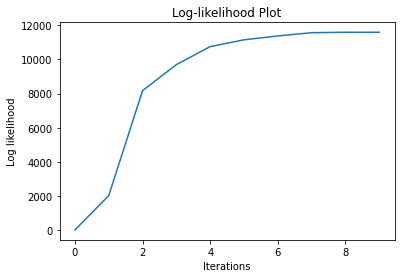

In [16]:
plt.title('Log-likelihood Plot')
plt.xlabel('Iterations')
plt.ylabel('Log likelihood')
plt.plot(np.mean(avg_ll,axis=0))